In [1]:
from IPython.display import Image, display

In [23]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
def rect_contains(rect, point):
    
    if point[0] < rect[0]:
        return False
    elif point[1] < rect[1]:
        return False
    elif point[0] > rect[2]:
        return False
    elif point[1] > rect[3]:
        return False
    return True

In [15]:
# Draw a point
def draw_point(img, p, color) :
    cv2.circle(img, p, 2, color, cv2.FILLED, cv2.LINE_AA, 0 )

In [52]:
# Draw delaunay triangles
def draw_delaunay(img, subdiv, delaunay_color) :
 
    triangleList = subdiv.getTriangleList();
    size = img.shape
    r = (0, 0, size[1], size[0])
    print(len(triangleList))
    for t in triangleList :
        pt1 = (t[0], t[1])
        pt2 = (t[2], t[3])
        pt3 = (t[4], t[5])
         
        if rect_contains(r, pt1) and rect_contains(r, pt2) and rect_contains(r, pt3) :
            cv2.line(img, pt1, pt2, delaunay_color, 1, cv2.LINE_AA, 0)
            cv2.line(img, pt2, pt3, delaunay_color, 1, cv2.LINE_AA, 0)
            cv2.line(img, pt3, pt1, delaunay_color, 1, cv2.LINE_AA, 0)

In [57]:
# Draw voronoi diagram
def draw_voronoi(img, subdiv) :
 
    ( facets, centers) = subdiv.getVoronoiFacetList([])
 
    for i in range(0,len(facets)) :
        ifacet_arr = []
        for f in facets[i] :
            ifacet_arr.append(f)
         
        ifacet = np.array(ifacet_arr, np.int)
        color = (np.random.randint(0, 255), np.random.randint(0, 255), np.random.randint(0, 255))
        cv2.fillConvexPoly(img, ifacet, color, cv2.LINE_AA, 0);
        ifacets = np.array([ifacet])
        cv2.polylines(img, ifacets, True, (0, 0, 0), 1, cv2.LINE_AA, 0)
        cv2.circle(img, (centers[i][0], centers[i][1]), 3, (0, 0, 0), cv2.FILLED, cv2.LINE_AA, 0)

In [58]:
# Define window names
win_delaunay = "Delaunay Triangulation"
win_voronoi = "Voronoi Diagram"

# Turn on animation while drawing triangles
animate = True

# Define colors for drawing.
delaunay_color = (255,255,255)
points_color = (0, 0, 255)

# Read in the image.
img = cv2.imread("obama.jpg");

# Keep a copy around
img_orig = img.copy();

In [59]:
# Rectangle to be used with Subdiv2D
size = img.shape
rect = (0, 0, size[1], size[0])

# Create an instance of Subdiv2D
subdiv = cv2.Subdiv2D(rect);

# Create an array of points.
points = [];

# Read in the points from a text file
with open("obama.jpg.txt") as file :
    for line in file :
        x, y = line.split()
        points.append((int(x), int(y)))

0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
16
17
19
20
21
23
24
27
28
29
31
33
35
37
39
41
43
45
47
49
51
53
55
57
59
61
63
65
67
69
71
73
75
77
79
81
83
85
87
89
91
93
95
97
99
101
103
105
107
107
107
109


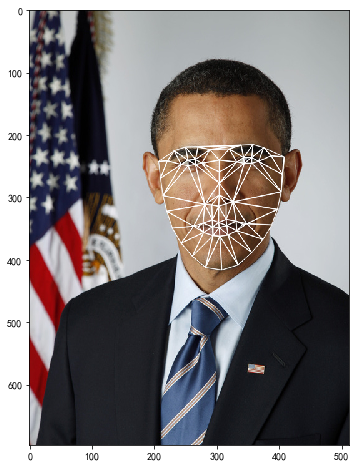

In [60]:
plt.figure(figsize=(12, 8))
# Insert points into subdiv
for p in points :
    subdiv.insert(p)
    # Show animation
    if animate :
        img_copy = img_orig.copy()
        # Draw delaunay triangles
        draw_delaunay(img_copy, subdiv, (255, 255, 255))
        plt.imshow(img_copy[:,:,::-1])

In [61]:
# Draw delaunay triangles
draw_delaunay( img, subdiv, (255, 255, 255) );
 
# Draw points
for p in points :
    draw_point(img, p, (0,0,255))

109


In [62]:
# Allocate space for Voronoi Diagram
img_voronoi = np.zeros(img.shape, dtype = img.dtype)

# Draw Voronoi diagram
draw_voronoi(img_voronoi,subdiv)

[[ -717 -1145]
 [  212   223]
 [  214   254]
 [-2438   549]]
[[  227   259]
 [  240   278]
 [-2573   680]
 [-2438   549]
 [  214   254]]
[[  242   280]
 [  251   287]
 [  247   302]
 [-2281   909]
 [-2751   853]
 [-2573   680]
 [  240   278]]
[[  250   317]
 [  244   328]
 [-1709   980]
 [-2281   909]
 [  247   302]]
[[  244   328]
 [  246   354]
 [ -988  1075]
 [-1709   980]]
[[ 261  365]
 [ 264  372]
 [-616 1127]
 [-988 1075]
 [ 246  354]]
[[ 264  372]
 [ 279  379]
 [ 286  386]
 [-380 1163]
 [-616 1127]]
[[ 286  386]
 [ 297  388]
 [ 298  389]
 [ 165 1255]
 [-380 1163]]
[[ 298  389]
 [ 313  388]
 [ 605 1336]
 [ 165 1255]]
[[ 313  388]
 [ 315  387]
 [ 330  382]
 [1328 1480]
 [ 605 1336]]
[[ 330  382]
 [ 335  376]
 [ 351  365]
 [1477 1331]
 [1520 1520]
 [1328 1480]]
[[ 351  365]
 [ 351  364]
 [ 367  347]
 [1402  977]
 [1477 1331]]
[[ 367  347]
 [ 368  323]
 [1340  672]
 [1402  977]]
[[ 368  323]
 [ 362  308]
 [ 364  297]
 [1308  499]
 [1340  672]]
[[ 361  286]
 [ 370  277]
 [ 373  274]


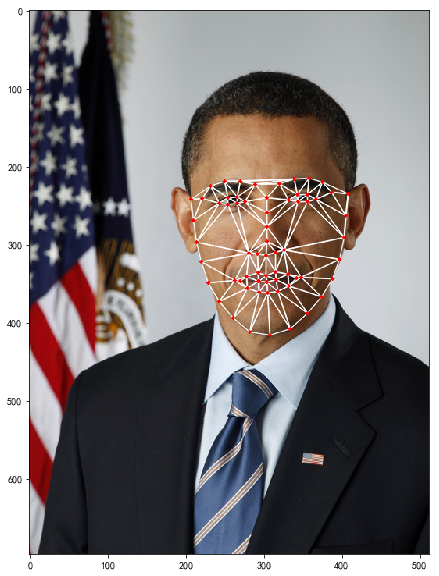

In [63]:
plt.figure(figsize=(12, 10))
plt.imshow(img[:,:,::-1])

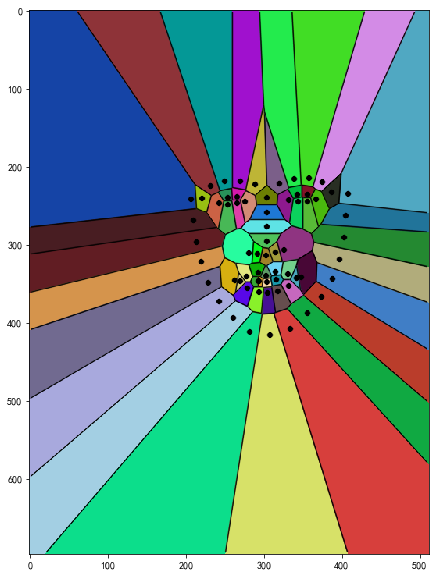

In [64]:
plt.figure(figsize=(12, 10))
plt.imshow(img_voronoi[:,:,::-1])